In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20181010002641-0000


In [55]:
titanic_train = pd.read_csv("https://s3-us-west-2.amazonaws.com/cursocienciadatos/train.csv")

In [3]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#sort_values: acomoda ya sea de orden ascendente o descendente ...
# los valores para una o varias columnas
titanic_train["Age"].sort_values(ascending=False).head(10)

630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
745    70.0
672    70.0
33     66.0
456    65.0
280    65.0
Name: Age, dtype: float64

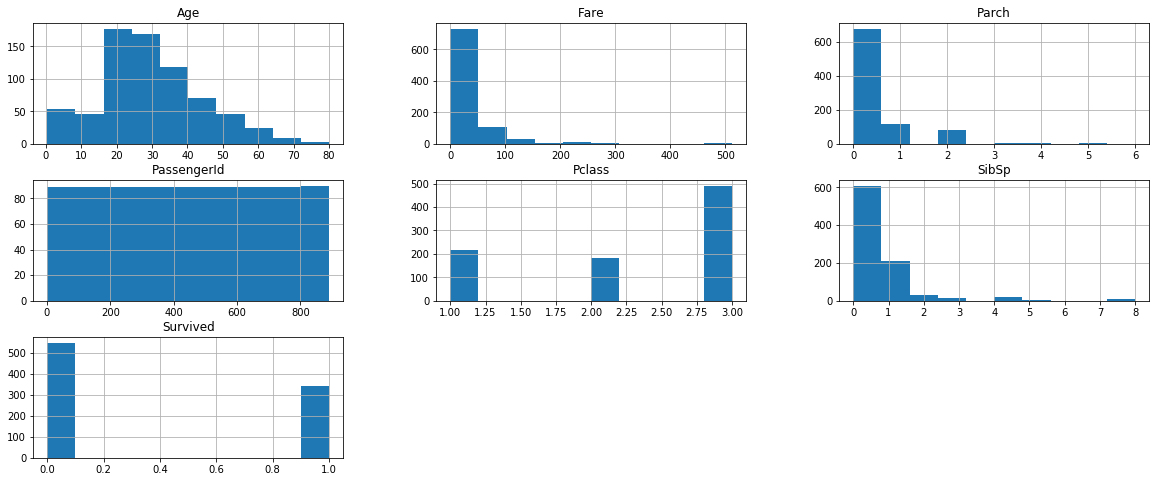

In [9]:
titanic_train.hist(figsize=(20, 8))
plt.show()

In [10]:
titanic_train["Age"].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [12]:
titanic_train[["Age", "Pclass"]].head()

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3


In [14]:
titanic_train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
titanic_train[["Sex"]].value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [16]:
titanic_train[["Name", "Sex"]].head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
4,"Allen, Mr. William Henry",male


In [17]:
titanic_train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [18]:
titanic_train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [19]:
titanic_train.loc[1:3, ["Name", "Sex"]]

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female


In [22]:
titanic_train.iloc[1:3, 3:5]

,Name,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
2,"Heikkinen, Miss. Laina",female


In [23]:
(titanic_train["Sex"] == "male").head()

0     True
1    False
2    False
3    False
4     True
Name: Sex, dtype: bool

In [24]:
titanic_train[["Sex"]].head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [25]:
titanic_train[titanic_train["Sex"] == "male"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [27]:
(titanic_train[["Sex"]] == "male").head()

,Sex
0,True
1,False
2,False
3,False
4,True


In [29]:
titanic_train.loc[titanic_train["Sex"] == "male", ["Name", "Sex"]].head()

,Name,Sex
0,"Braund, Mr. Owen Harris",male
4,"Allen, Mr. William Henry",male
5,"Moran, Mr. James",male
6,"McCarthy, Mr. Timothy J",male
7,"Palsson, Master. Gosta Leonard",male


In [34]:
titanic_train.loc[(titanic_train["Sex"] == "female") & (titanic_train["Pclass"] == 1), ["Sex", "Pclass", "Age"]].head(3)

,Sex,Pclass,Age
1,female,1,38.0
3,female,1,35.0
11,female,1,58.0


In [35]:
titanic_train["Woman?"] = titanic_train["Sex"] == "female"
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Woman?
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [37]:
def tipo_boleto(boleto):
    if boleto <= 50:
        return "barato"
    elif boleto <= 100:
        return "normal"
    else:
        "costoso"

titanic_train["Tipo Boleto"] = titanic_train["Fare"].map(tipo_boleto)

In [39]:
titanic_train.loc[0:5, ["Fare", "Tipo Boleto"]]

,Fare,Tipo Boleto
0,7.2500,barato
1,71.2833,normal
2,7.9250,barato
3,53.1000,normal
4,8.0500,barato
5,8.4583,barato


In [44]:
titanic_train[["Fare", "Age"]].min()

Fare    0.00
Age     0.42
dtype: float64

In [47]:
titanic_train.groupby(["Sex"]).aggregate({"Fare": "max", "Pclass": "mean", "Age": "std"})

,Fare,Age,Pclass
Sex,,,
female,512.3292,14.110146,2.159236
male,512.3292,14.678201,2.389948


In [51]:
titanic_train.groupby(["Sex"])["Pclass"].value_counts().unstack()

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [55]:
def sibsp_parch(grupo):
    return grupo["SibSp"].sum() + grupo["Parch"].sum()

titanic_train.groupby(["Sex"]).apply(sibsp_parch)

Sex
female    422
male      384
dtype: int64

In [56]:
titanic_train[titanic_train["Sex"] == "male"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Woman?,Tipo Boleto
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,barato
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,barato
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,False,barato
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,False,normal
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,False,barato


In [58]:
titanic_train[titanic_train["Sex"] == "female"].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Woman?,Tipo Boleto
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,normal
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,barato
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,normal
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,True,barato
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,True,barato


In [60]:
little_titanic = titanic_train.head()
little_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Woman?,Tipo Boleto
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,barato
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,normal
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,barato
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,normal
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,barato


In [62]:
little_titanic.pivot_table(index=["Sex"], columns=["Pclass"], values="Survived")

Pclass,1,3
Sex,,
female,1.0,1.0
male,NaN,0.0


In [63]:
titanic_train.pivot_table(index=["Sex"], columns=["Pclass"], values="Survived")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# Solucion a los ejercicios

## Analisys de datos
### Pokemon

### a) Crear un dataframe llamado pokemonDF, con los datos de pokemon.csv

In [2]:
pokemon = pd.read_csv("https://s3-us-west-2.amazonaws.com/cursocienciadatos/pokemon.csv")
pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
abilities            801 non-null object
against_bug          801 non-null float64
against_dark         801 non-null float64
against_dragon       801 non-null float64
against_electric     801 non-null float64
against_fairy        801 non-null float64
against_fight        801 non-null float64
against_fire         801 non-null float64
against_flying       801 non-null float64
against_ghost        801 non-null float64
against_grass        801 non-null float64
against_ground       801 non-null float64
against_ice          801 non-null float64
against_normal       801 non-null float64
against_poison       801 non-null float64
against_psychic      801 non-null float64
against_rock         801 non-null float64
against_steel        801 non-null float64
against_water        801 non-null float64
attack               801 non-null int64
base_egg_steps       801 non-null int64
base_happiness    

### b) Cuantas filas y columnas tiene pokemonDF?
**filas = 801, columnas = 41**

### c) Cuantas columnas hay con missin values?
**Hay 4 columnas con missing values**

In [6]:
pokemon.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


### d) Cual es el valor maximo de la columna hp?
El valor maximo es **255**

### e) Cual es el valor promedio de la columna speed?
El valor promedio de speed es **66.334582**

### f) Que generaciones abarcan la mitad de los datos?
**generacion 1, generacion 2, generacion 3, generacion 4**

## Countries

### a) Crear un dataframe llamado countriesDF

In [3]:
countriesDF = pd.read_csv("https://s3-us-west-2.amazonaws.com/cursocienciadatos/countries+of+the+world.csv")
countriesDF.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [10]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

### b) Cuantas filas y columnas tiene countriesDF?
filas: **227** y columnas: **20**

### c) Cuantas columnas hay con missing values?
**14**

### d) Cuantas columnas de tipo: object, float64 e int64 hay?
object: **17** 


float64: **1**


int64: **2**


In [11]:
countries.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


### e) Cual es el valor maximo de la columna population?
**1.31397e+09**
### d) Cual es el valor promedio de la columna population?
**2.874028e+07**

## Visual exploratory data analysis

## Pokemon
### a) Crear las graficas

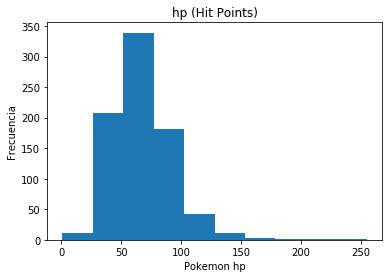

In [13]:
pokemon["hp"].plot(kind="hist")
plt.title("hp (Hit Points)")
plt.ylabel("Frecuencia")
plt.xlabel("Pokemon hp")
plt.show()

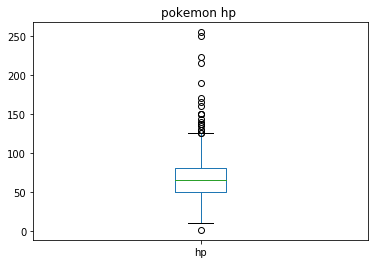

In [4]:
pokemon.loc[:, ["hp"]].plot(kind="box")
plt.title("pokemon hp ")
plt.show()

In [15]:
serie_type = pokemon["type1"].value_counts()
serie_type

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

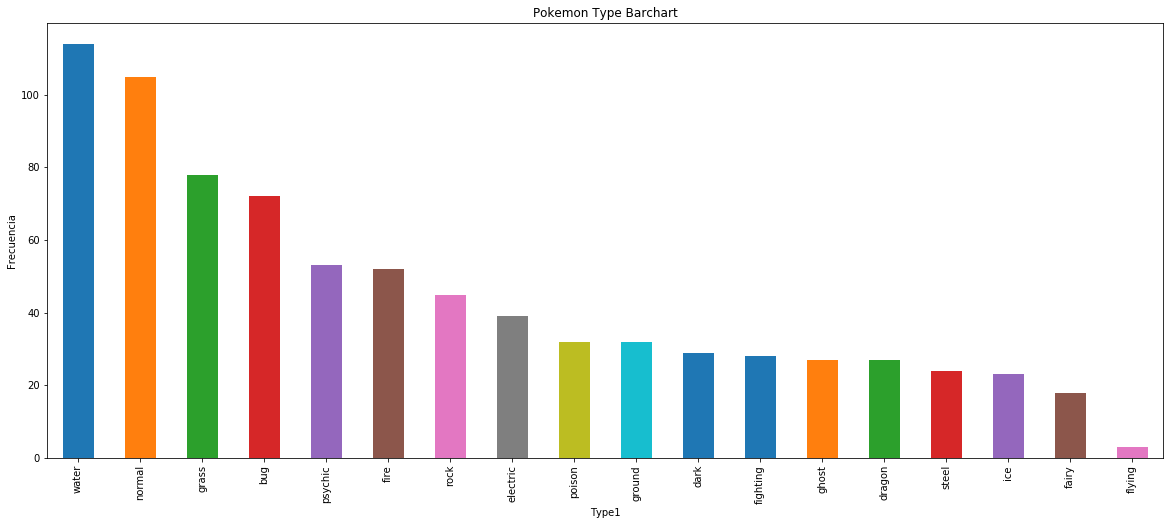

In [17]:
serie_type.plot(kind="bar", figsize=(20, 8))
plt.title("Pokemon Type Barchart")
plt.ylabel("Frecuencia")
plt.xlabel("Type1")
plt.show()

## Vigeogames
### a) Crear las graficas

In [5]:
vgsales = pd.read_csv("https://s3-us-west-2.amazonaws.com/cursocienciadatos/vgsales.csv")
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
serie_platform = vgsales["Platform"].value_counts()
serie_platform.head()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: Platform, dtype: int64

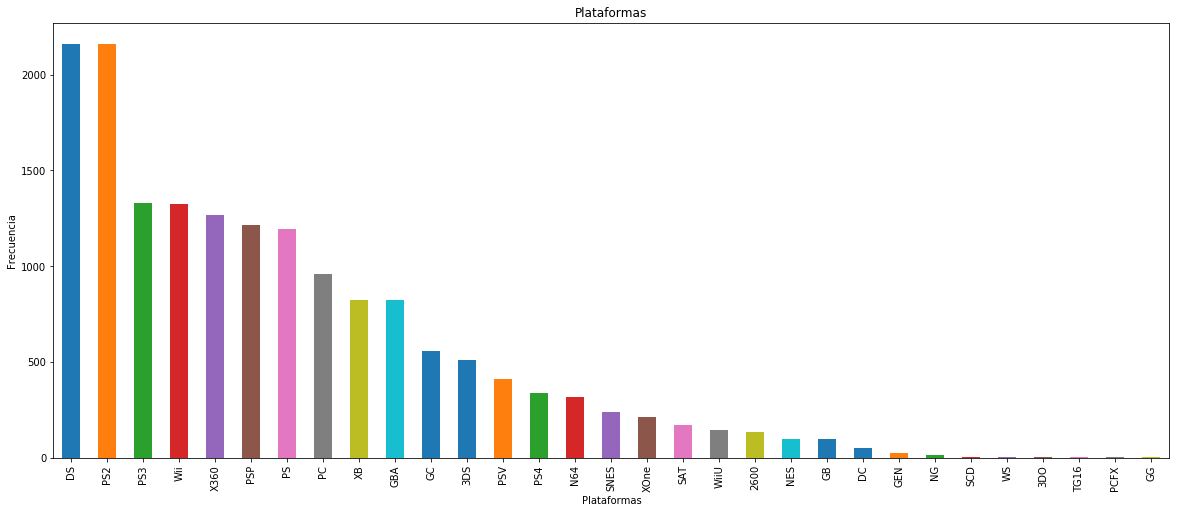

In [7]:
serie_platform.plot(kind="bar", figsize=(20, 8))
plt.title("Plataformas")
plt.ylabel("Frecuencia")
plt.xlabel("Plataformas")
plt.show()

## Select, Filter, Create and Transform
## Pokemon
### a) Crear el siguiente dataframe

In [36]:
pokemon_fire = pokemon.loc[pokemon["type1"] == "fire", ["type1", "name", "hp", "attack", "defense", "is_legendary"]]
pokemon_fire.head()

,type1,name,hp,attack,defense,is_legendary
3,fire,Charmander,39,52,43,0
4,fire,Charmeleon,58,64,58,0
5,fire,Charizard,78,104,78,0
36,fire,Vulpix,38,41,40,0
37,fire,Ninetales,73,67,75,0


### b) Crear el siguiente dataframe, agregando la columna “classification_attack”

In [37]:
def clasificador(attack):
    if attack < 100:
        return "Weak"
    elif attack < 150:
        return "Normal"
    else:
        return "Strong"
    
pokemon_fire["classification_attack"] = pokemon_fire["attack"].map(clasificador)
pokemon_fire.head()

,type1,name,hp,attack,defense,is_legendary,classification_attack
3,fire,Charmander,39,52,43,0,Weak
4,fire,Charmeleon,58,64,58,0,Weak
5,fire,Charizard,78,104,78,0,Normal
36,fire,Vulpix,38,41,40,0,Weak
37,fire,Ninetales,73,67,75,0,Weak


In [40]:
pokemon_fire["classification_attack"].value_counts()

Weak      39
Normal    12
Strong     1
Name: classification_attack, dtype: int64

In [41]:
pokemon_fire[pokemon_fire["classification_attack"] == "Strong"]

,type1,name,hp,attack,defense,is_legendary,classification_attack
256,fire,Blaziken,80,160,80,0,Strong


### c) Preguntas
* Cuantos pokemon con un valor de strong hay? **1**
* A que se debe este resultado? **Los de tipo fuego se especializan en atacar con ataques especiales**
* Quienes son los pokemones con el valor strong? **Blaziken**

## Groupby and Aggregations
## Pokemon
### a) Crear el dataframe "PokemonDF" con las siguientes columnas

In [42]:
pokemon_grupos = pokemon[["type1", "name", "hp", "attack", "defense", "is_legendary", "generation", "sp_attack", "sp_defense"]]
pokemon_grupos.head()

,type1,name,hp,attack,defense,is_legendary,generation,sp_attack,sp_defense
0,grass,Bulbasaur,45,49,49,0,1,65,65
1,grass,Ivysaur,60,62,63,0,1,80,80
2,grass,Venusaur,80,100,123,0,1,122,120
3,fire,Charmander,39,52,43,0,1,60,50
4,fire,Charmeleon,58,64,58,0,1,80,65


### b) Crear el siguiente dataframe

In [43]:
pokemonGR = pokemon_grupos.groupby(["type1"]).aggregate({"hp": "mean", "attack": "max", "sp_attack": "max", "defense": "mean", "sp_defense": "mean"})
pokemonGR

,attack,hp,sp_attack,sp_defense,defense
type1,,,,,
bug,185,56.722222,145,62.513889,70.847222
dark,150,72.551724,140,69.068966,70.517241
dragon,180,79.851852,180,84.555556,86.259259
electric,123,60.512821,173,70.051282,61.820513
fairy,131,73.944444,131,87.777778,68.166667
fighting,145,71.428571,140,63.428571,66.392857
fire,160,68.730769,159,71.538462,67.788462
flying,100,68.000000,110,70.000000,65.000000
ghost,165,63.370370,170,78.296296,79.518519


### c) Repetir el mismo proceso pero ahora usando "generation" como key

In [44]:
pokemonGR = pokemon_grupos.groupby(["generation"]).aggregate({"hp": "mean", "attack": "max", "sp_attack": "max", "defense": "mean", "sp_defense": "mean"})
pokemonGR

,attack,hp,sp_attack,sp_defense,defense
generation,,,,,
1,155,64.344371,194,67.741722,70.079470
2,185,70.980000,165,73.440000,71.790000
3,180,65.666667,180,69.392593,72.637037
4,170,73.102804,150,74.523364,76.168224
5,150,70.314103,170,67.711538,71.961538
6,160,71.111111,170,73.194444,73.555556
7,181,70.575000,173,75.650000,78.012500


### d) Si sumamos todas las columnas de cada generacion (fila), cual seria la generacion con la mayor suma?
**La 7**

In [46]:
pokemonGR.sum(axis=1)

generation
1    551.165563
2    566.210000
3    567.696296
4    543.794393
5    529.987179
6    547.861111
7    578.237500
dtype: float64

## Problems with the data
### a) Que problemas tiene el dataframe?
* la columna carrera tiene missing values
* La columna calificacion tiene missing values
* la columna calificacion tiene outliers
* la columna calificacion es de tipo object en lugar de float
* Filas fuplicadas

In [9]:
escuela = pd.read_csv("https://s3-us-west-2.amazonaws.com/cursocienciadatos/escuela.csv", sep=";")
escuela

,studen,carrera,calificacion,smtr
0,Oskar Monroy,IMT,130.0,3
1,Gary Kasparov,IIS,81.0,7
2,Gaynor Anspach,?,?,8
3,Ash Ketchum,IMT,95.0,9
4,Lytton Jaime,IIS,82.5,2
5,Pindari Villareal,IMT,85.0,1
6,Yuan Foor,ITIC,64.0,1
7,Tuesday Pepper,IIS,?,5
8,Yuan Foor,ITIC,64.0,1
9,Boden Scotto,IIS,87.0,6


In [48]:
escuela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
studen          30 non-null object
carrera         30 non-null object
calificacion    30 non-null object
smtr            30 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.0+ KB


## Handling the problems
### a) Arreglar el dataframe

Empezaremos con la columna carrera, primero reemplazaremos todos los "?" con np.nan para poder usar el metodo fillna

In [10]:
escuela["carrera"] = escuela["carrera"].replace("?", np.nan)
escuela

,studen,carrera,calificacion,smtr
0,Oskar Monroy,IMT,130.0,3
1,Gary Kasparov,IIS,81.0,7
2,Gaynor Anspach,NaN,?,8
3,Ash Ketchum,IMT,95.0,9
4,Lytton Jaime,IIS,82.5,2
5,Pindari Villareal,IMT,85.0,1
6,Yuan Foor,ITIC,64.0,1
7,Tuesday Pepper,IIS,?,5
8,Yuan Foor,ITIC,64.0,1
9,Boden Scotto,IIS,87.0,6


Reemplazamos los np.nan con los valores del metodo fillna

In [11]:
escuela["carrera"] = escuela["carrera"].fillna(method="ffill")
escuela

,studen,carrera,calificacion,smtr
0,Oskar Monroy,IMT,130.0,3
1,Gary Kasparov,IIS,81.0,7
2,Gaynor Anspach,IIS,?,8
3,Ash Ketchum,IMT,95.0,9
4,Lytton Jaime,IIS,82.5,2
5,Pindari Villareal,IMT,85.0,1
6,Yuan Foor,ITIC,64.0,1
7,Tuesday Pepper,IIS,?,5
8,Yuan Foor,ITIC,64.0,1
9,Boden Scotto,IIS,87.0,6


**Nota:** Tambien pudimos haber usado mode y el replace.

Hacemos el mismo procedimiento para la columna calificacion

In [12]:
escuela["calificacion"] = escuela["calificacion"].replace("?", np.nan)
escuela

,studen,carrera,calificacion,smtr
0,Oskar Monroy,IMT,130.0,3
1,Gary Kasparov,IIS,81.0,7
2,Gaynor Anspach,IIS,NaN,8
3,Ash Ketchum,IMT,95.0,9
4,Lytton Jaime,IIS,82.5,2
5,Pindari Villareal,IMT,85.0,1
6,Yuan Foor,ITIC,64.0,1
7,Tuesday Pepper,IIS,NaN,5
8,Yuan Foor,ITIC,64.0,1
9,Boden Scotto,IIS,87.0,6


In [13]:
escuela["calificacion"] = escuela["calificacion"].astype("float64")
escuela

,studen,carrera,calificacion,smtr
0,Oskar Monroy,IMT,130.0,3
1,Gary Kasparov,IIS,81.0,7
2,Gaynor Anspach,IIS,NaN,8
3,Ash Ketchum,IMT,95.0,9
4,Lytton Jaime,IIS,82.5,2
5,Pindari Villareal,IMT,85.0,1
6,Yuan Foor,ITIC,64.0,1
7,Tuesday Pepper,IIS,NaN,5
8,Yuan Foor,ITIC,64.0,1
9,Boden Scotto,IIS,87.0,6


Arreglamos los outliers, si el valor es mayor a 100 lo cambiamos a 100

In [15]:
escuela.loc[escuela["calificacion"] > 100, ["calificacion"]] = 100
escuela

,studen,carrera,calificacion,smtr
0,Oskar Monroy,IMT,100.0,3
1,Gary Kasparov,IIS,81.0,7
2,Gaynor Anspach,IIS,NaN,8
3,Ash Ketchum,IMT,95.0,9
4,Lytton Jaime,IIS,82.5,2
5,Pindari Villareal,IMT,85.0,1
6,Yuan Foor,ITIC,64.0,1
7,Tuesday Pepper,IIS,NaN,5
8,Yuan Foor,ITIC,64.0,1
9,Boden Scotto,IIS,87.0,6


Sacamos el promedio de los valores para llenar los valores faltantes

In [16]:
promedio = escuela["calificacion"].mean()
escuela["calificacion"] = escuela["calificacion"].replace(np.nan, promedio)
escuela

,studen,carrera,calificacion,smtr
0,Oskar Monroy,IMT,100.000000,3
1,Gary Kasparov,IIS,81.000000,7
2,Gaynor Anspach,IIS,81.092593,8
3,Ash Ketchum,IMT,95.000000,9
4,Lytton Jaime,IIS,82.500000,2
5,Pindari Villareal,IMT,85.000000,1
6,Yuan Foor,ITIC,64.000000,1
7,Tuesday Pepper,IIS,81.092593,5
8,Yuan Foor,ITIC,64.000000,1
9,Boden Scotto,IIS,87.000000,6


Por ultimo cambiamos los nombres erroneos de las columnas

In [19]:
escuela = escuela.rename(columns={"studen": "estudiante", "smtr": "semestre"})
escuela

,estudiante,carrera,calificacion,semestre
0,Oskar Monroy,IMT,100.000000,3
1,Gary Kasparov,IIS,81.000000,7
2,Gaynor Anspach,IIS,81.092593,8
3,Ash Ketchum,IMT,95.000000,9
4,Lytton Jaime,IIS,82.500000,2
5,Pindari Villareal,IMT,85.000000,1
6,Yuan Foor,ITIC,64.000000,1
7,Tuesday Pepper,IIS,81.092593,5
8,Yuan Foor,ITIC,64.000000,1
9,Boden Scotto,IIS,87.000000,6


In [20]:
escuela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
estudiante      30 non-null object
carrera         30 non-null object
calificacion    30 non-null float64
semestre        30 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.0+ KB
